In [0]:
talktools.py

NameError: ignored

In [0]:
#################################

#Code for Alteryx

# List all non-standard packages to be imported by your 
# script here (only missing packages will be installed)
#from ayx import Package
#Package.installPackages(['pandas','numpy'])


#from ayx import Alteryx

#Alteryx.read("#1")
#data = Alteryx.read("#1")

In [0]:
#some libraries
%matplotlib inline
import pandas as pd
import numpy as np
from google.colab import files
from pandas import Series, DataFrame
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

#Normalize
from sklearn.preprocessing import MinMaxScaler
Mms = MinMaxScaler ()

#StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Get dataset
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Cluster-Analysis/Base-NoLA-v1.csv", encoding='latin-1')
data.head()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Fecha,Año,Mes,Region_Nola,Pais,Canal,Distribuidor,Ciudad_Distribuidor,Vendedor Push,DTM,Vendedor,RFC,Razon Social Operador,Rtm,Clasificacion,Fecha Alta,Count_Skus,Count_Skus_Descrip,Count_Categorias,Count_Marcas,Sum_Cajas,Sum_Peso_Neto_KG,Count_Top 10,Sum_Euro,Sum_Niv Euro,Max_Fecha,Min_Fecha,Group_date,Revisión
0,2018-03-01,2018,MARZO,Andina,COLOMBIA,Trade,CUATROE S A S,PEREIRA,John Vasquez,C,FREE TRADE,10006823,JHON JAIRO VALENCIA,F.TRADE,0,NaN,2,2,2,2,0.395833,6.200000,0,21.049648,19.365676,2020-03-01,2018-01-01,Group 1,2018-04-30
1,2018-03-01,2018,MARZO,Andina,COLOMBIA,Trade,CUATROE S A S,PEREIRA,John Vasquez,C,FREE TRADE,10027437,ROBLEDO JORGE EDUARDO,F.TRADE,0,NaN,4,4,4,4,12.250000,182.936249,1,311.534313,286.611570,2020-03-01,2018-01-01,Group 1,2018-04-30
2,2018-03-01,2018,MARZO,Andina,COLOMBIA,Trade,CUATROE S A S,PEREIRA,John Vasquez,C,FREE TRADE,10070054,HERRERA AGUDELO HENRY BENJAMIN,F.TRADE,0,NaN,2,2,2,2,0.500000,8.120000,2,16.390652,15.079400,2020-03-01,2018-01-01,Group 1,2018-04-30
3,2018-03-01,2018,MARZO,Andina,COLOMBIA,Trade,CUATROE S A S,PEREIRA,John Vasquez,C,FREE TRADE,10099018,FERNANDEZ GERMAN,F.TRADE,0,NaN,2,2,2,2,1.000000,16.240000,2,32.781304,30.158800,2020-03-01,2018-01-01,Group 1,2018-04-30
4,2018-03-01,2018,MARZO,Andina,COLOMBIA,Trade,CUATROE S A S,PEREIRA,John Vasquez,C,FREE TRADE,10099018,LA VINA CIRCUNVALAR .,F.TRADE,0,NaN,1,1,1,1,0.750000,11.310000,1,25.958296,23.881632,2020-03-01,2018-01-01,Group 1,2018-04-30


In [0]:
data.columns

Index(['Fecha', 'Año', 'Mes', 'Region_Nola', 'Pais', 'Canal', 'Distribuidor',
       'Ciudad_Distribuidor', 'Vendedor Push', 'DTM', 'Vendedor', 'RFC',
       'Razon Social Operador', 'Rtm', 'Clasificacion', 'Fecha Alta',
       'Count_Skus', 'Count_Skus_Descrip', 'Count_Categorias', 'Count_Marcas',
       'Sum_Cajas', 'Sum_Peso_Neto_KG', 'Count_Top 10', 'Sum_Euro',
       'Sum_Niv Euro', 'Max_Fecha', 'Min_Fecha', 'Group_date', 'Revisión'],
      dtype='object')

## Include OTM

In [0]:
X = data[['Count_Skus', 'Sum_Euro', 'Sum_Cajas','Count_Top 10','Clasificacion','Count_Categorias', 'Count_Marcas','Sum_Peso_Neto_KG']]
X['Clasif_Num'] = [1 if x =='A' 
                   else 2 if x=='B'
                   else 3 if x=='C'
                   else 4 if x=='D'
                   else 5 
                   for x in X['Clasificacion']]
X2 = pd.DataFrame(data=X,columns=['Count_Skus', 'Sum_Euro', 'Sum_Cajas','Count_Top 10','Clasif_Num','Count_Categorias', 'Count_Marcas','Sum_Peso_Neto_KG'])

X2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Count_Skus,Sum_Euro,Sum_Cajas,Count_Top 10,Clasif_Num,Count_Categorias,Count_Marcas,Sum_Peso_Neto_KG
0,2,21.049648,0.395833,0,5,2,2,6.200000
1,4,311.534313,12.250000,1,5,4,4,182.936249
2,2,16.390652,0.500000,2,5,2,2,8.120000
3,2,32.781304,1.000000,2,5,2,2,16.240000
4,1,25.958296,0.750000,1,5,1,1,11.310000


## Normalize data with OTM

Text(0, 0.5, 'GSV Euros')

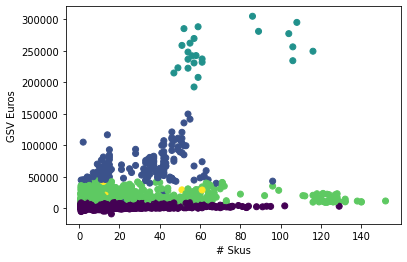

In [0]:

DF_nm2 = Mms.fit_transform(X2)
X3 = X2.drop(['Clasif_Num'],axis=1)
Y = np.array(X2['Clasif_Num'].astype(float))

KM_5 = KMeans(n_clusters=5, random_state=0).fit(X3,sample_weight = Y)

plt.scatter(X2['Count_Skus'], X2['Sum_Euro'], c=KM_5.labels_)
plt.xlabel("# Skus")
plt.ylabel("GSV Euros")

In [0]:
X3.head()

,Count_Skus,Sum_Euro,Sum_Cajas,Count_Top 10,Count_Categorias,Count_Marcas,Sum_Peso_Neto_KG
0,2,21.049648,0.395833,0,2,2,6.200000
1,4,311.534313,12.250000,1,4,4,182.936249
2,2,16.390652,0.500000,2,2,2,8.120000
3,2,32.781304,1.000000,2,2,2,16.240000
4,1,25.958296,0.750000,1,1,1,11.310000


In [0]:
fig2 = px.scatter_3d(X2, x='Count_Skus', y='Sum_Euro', z='Count_Top 10',color=KM_5.labels_)
fig2.show()

### Current clasification vs Clusterization

In [0]:
fig3 = px.scatter_3d(X2, x='Count_Skus', y='Sum_Euro', z='Clasif_Num',
              color=KM_5.labels_)
fig3.show()


## Cluster description

In [0]:

cluslist=list(X3['index'])


labels=list(KM_5.labels_)

newlist=dict(zip(cluslist, labels))
newlist

newclus=DataFrame.from_dict(newlist, orient='index')
newclus

newclus.columns = ['cluster']

newclus.reset_index(level=0, inplace=True)

merged_X=pd.merge(X3, newclus, on='index')


KeyError: ignored

##### Cluster frecuencies 

In [0]:
# cluster frequencies
merged_X.cluster.value_counts()

#### Current calsification frecuencies

In [0]:
merged_X.Clasif_Num.value_counts()

## Statistics by cluster


In [0]:
## With OTM
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=merged_X["cluster"], y=merged_X["Count_Skus"], data=merged_X)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=merged_X["cluster"], y=merged_X["Sum_Euro"], data=merged_X)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(x=merged_X["cluster"], y=merged_X["Count_Top 10"], data=merged_X)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot(x=merged_X["cluster"], y=merged_X["Sum_Cajas"], data=merged_X)

f.tight_layout()

### References

* https://community.alteryx.com/t5/Alteryx-Designer-Knowledge-Base/Tool-Mastery-Python/ta-p/197860
* https://scikit-learn.org/stable/modules/preprocessing.html
* https://benalexkeen.com/feature-scaling-with-scikit-learn/
* https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339
* https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d
* https://seaborn.pydata.org/generated/seaborn.heatmap.html